In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_pickle("./cyl10to11.pkl") 
# get param set
paramsets =  pd.read_csv('../../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets['theta_th']=paramsets['theta']
paramsets['pSet'] = np.array([i for i in range(99)])

df['cxd']=df['cod']+df['ccd']
df['cxa']=df['coa']+df['cca']
df['cx']=df['co']+df['cc']
df['cxd_cx']=df['cxd']/df['cx']
df['cxa_cx']=df['cxa']/df['cx']
df['theta']=df['wat']/df['vol']
df  = pd.merge(df, paramsets[['pSet', 'theta_th']], on="pSet")
df['csBis'] = df['cs']*df['theta']/df['theta_th']
df['clBis'] = df['cl']*df['theta']/df['theta_th']

In [3]:
print(min(df['simTime'] )/3600)

0.6236171821691096


In [82]:
psetouliers = set()#[2, 14, 41 ,52, 62])
psetCaCx = set(set( df[(df['cxa_cx']>=0.6)]['pSet'].unique())  )
pSethighC = set(set( df[df['csBis']>5e-4]['pSet'].unique())  ) 
pSethighCoCc = set(set( df[(df['co'] + df['cc'])>1e-3]['pSet'].unique())  )
print(psetouliers,psetCaCx,pSethighC)
print(set( df['pSet'].unique()) - psetCaCx, set( df['pSet'].unique()) - pSethighC, set( df['pSet'].unique()) - pSethighCoCc)
print('psetCaCx',set( df['pSet'].unique()) - psetCaCx -psetouliers,len(set( df['pSet'].unique()) - psetCaCx-psetouliers) )
print('pSethighC',set( df['pSet'].unique()) - psetCaCx - pSethighC-psetouliers,
      len(set( df['pSet'].unique()) - psetCaCx - pSethighC-psetouliers ))
print('pSethighCoCc',set( df['pSet'].unique()) - psetCaCx - pSethighC - pSethighCoCc-psetouliers)
if False:
    dfissue = df[(df['cxa_cx']>=0.6)]#|((df['cxa_cx']<= 0.006))]
    #psetCaCx 
    pSetSelect =set( df['pSet'].unique()) - set( dfissue['pSet'].unique())  
    print('pSetSelect, ca/cx ratio',pSetSelect )
    keepdf = df.loc[[ pp in pSetSelect for pp in df['pSet']] ].copy()

    pSethighC = np.unique(df[df['csBis']>4.6e-5]['pSet'])#{3, 21, 24, 34, 50, 57, 62, 74, 97}
    pSetSelect = set(np.unique(df['pSet'])) - set(pSethighC) #- set( np.array( [2, 14, 17 ,41 ,52, 57 ,59, 62, 74]))
    print('pSethighC',len(pSethighC),pSetSelect )
    #keepdf2 = keepdf.loc[[ pp in pSetSelect for pp in keepdf['pSet']] ].copy()
    
print(np.unique(df[df['pSet']==5]['simTime'])/3600)
print(0.75696687*60)

{2, 41, 14, 52, 62} {0, 2, 3, 4, 6, 9, 10, 11, 14, 16, 17, 18, 24, 26, 30, 31, 33, 36, 38, 40, 42, 43, 46, 48, 50, 51, 53, 54, 55, 58, 64, 65, 69, 71, 72, 75, 77, 78, 80, 81, 84, 88, 89, 90, 92, 94, 95, 98} {0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 14, 15, 16, 18, 19, 23, 24, 26, 28, 29, 30, 31, 33, 35, 36, 37, 41, 43, 45, 46, 48, 49, 50, 51, 52, 54, 58, 59, 62, 63, 64, 65, 68, 71, 72, 73, 77, 78, 79, 81, 87, 88, 90, 93, 94}
{1, 5, 7, 8, 15, 19, 21, 23, 25, 27, 28, 29, 34, 35, 37, 41, 45, 47, 49, 52, 56, 57, 59, 60, 62, 63, 68, 70, 73, 74, 76, 79, 82, 83, 85, 86, 87, 93, 96, 97} {5, 7, 17, 21, 25, 27, 34, 38, 40, 42, 47, 53, 55, 56, 57, 60, 69, 70, 74, 75, 76, 80, 82, 83, 84, 85, 86, 89, 92, 95, 96, 97, 98} {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 8

/tmp/ipykernel_996/2369985523.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['pSet'], subset['simTime']/3600, alpha=0.3,


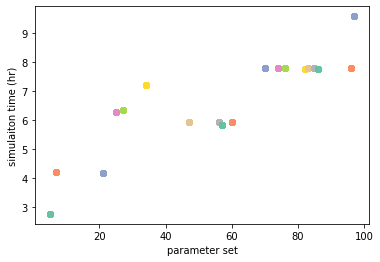

In [69]:


unique_values = set( df['pSet'].unique()) - psetCaCx - pSethighC - pSethighCoCc-psetouliers
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['pSet'], subset['simTime']/3600, alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('parameter set')
plt.ylabel('simulaiton time (hr)')

plt.show()

/tmp/ipykernel_996/2917418788.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cx'], subset['cxa']/subset['cx'], alpha=0.3,


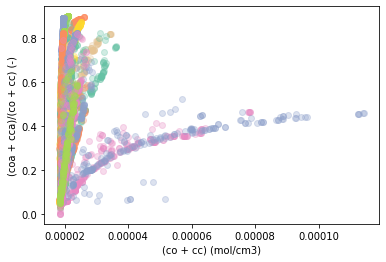

In [71]:
unique_values =set( df['pSet'].unique())- psetCaCx -psetouliers
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cx'], subset['cxa']/subset['cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('(co + cc) (mol/cm3)')
plt.ylabel('(coa + cca)/(co + cc) (-)')

plt.show()

/tmp/ipykernel_996/3993990785.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cx'], subset['cxa']/subset['cx'], alpha=0.3,


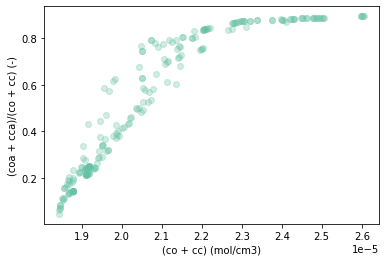

In [83]:
unique_values = [5]#set( df['pSet'].unique())- psetCaCx -psetouliers
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cx'], subset['cxa']/subset['cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('(co + cc) (mol/cm3)')
plt.ylabel('(coa + cca)/(co + cc) (-)')

plt.show()

/tmp/ipykernel_996/2925034109.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'], subset['cc'] + subset['co'], alpha=0.3,


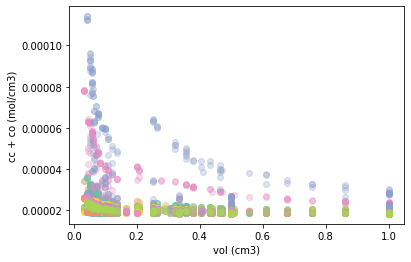

In [72]:
unique_values = set( df['pSet'].unique())- psetCaCx -psetouliers
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'], subset['cc'] + subset['co'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cc + co (mol/cm3)')

plt.show()

In [73]:
min(df['cc'] + df['co'])

1.8335067855101376e-05

/tmp/ipykernel_996/2751565741.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'], subset['csBis'], alpha=0.3,


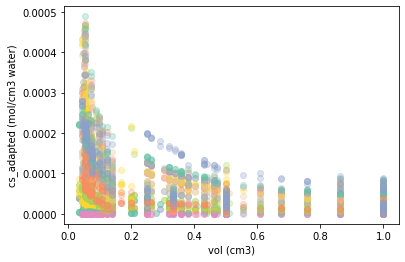

In [74]:
unique_values = set( df['pSet'].unique()) - psetCaCx - pSethighC-psetouliers
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'], subset['csBis'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs_adapted (mol/cm3 water)')

plt.show()

/tmp/ipykernel_996/3402625238.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'], subset['cs']+subset['cl'], alpha=0.3,


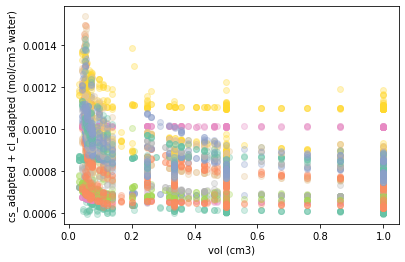

In [76]:
unique_values =set( df['pSet'].unique()) - psetCaCx - pSethighC-psetouliers
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'], subset['cs']+subset['cl'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs_adapted + cl_adapted (mol/cm3 water)')

plt.show()

/tmp/ipykernel_996/1030543409.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3,
/tmp/ipykernel_996/1030543409.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3,
/tmp/ipykernel_996/1030543409.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping w

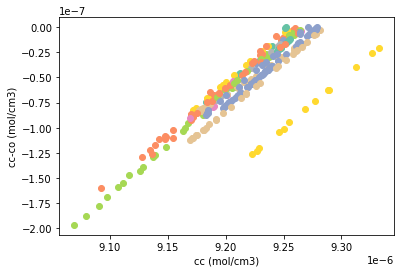

In [77]:
unique_values =set( df['pSet'].unique()) - psetCaCx - pSethighC-psetouliers
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    mehrCo = subset[subset['cc-co']<0]
    plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('cc-co (mol/cm3)')

plt.show()

/tmp/ipykernel_996/568431936.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3,


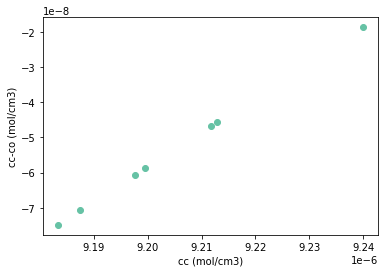

In [78]:

for value in [5]:
    subset = df[df['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    mehrCo = subset[subset['cc-co']<0]
    plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('cc-co (mol/cm3)')

plt.show()

In [203]:

dfissue = keepdf2[(keepdf2['cc']<keepdf2['co'])]#|((df['cxa_cx']<= 0.006))]
pSetSelect =set( keepdf2['pSet'].unique()) - set( dfissue['pSet'].unique())
keepdf3 = keepdf2.loc[[ pp in pSetSelect for pp in keepdf2['pSet']] ].copy()

In [204]:
pSetSelect

{3}

/tmp/ipykernel_996/2091515305.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cc'], subset['cc']-subset['co'], alpha=0.3,


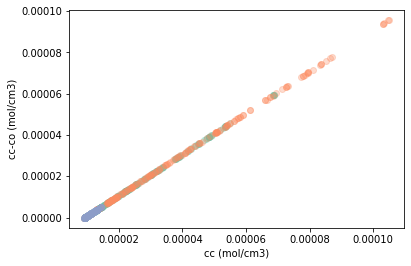

In [32]:
unique_values =set( df['pSet'].unique()) - psetCaCx - pSethighC# dfissue['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cc'], subset['cc']-subset['co'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('cc-co (mol/cm3)')

plt.show()

In [175]:
pSethighC = np.unique(dfn[dfn['csBis']>4.6e-5]['pSet'])#{3, 21, 24, 34, 50, 57, 62, 74, 97}

In [178]:
set(np.unique(dfn['pSet'])) - set(pSethighC)

{3, 21, 24, 34, 50, 57, 62, 74, 97}

/tmp/ipykernel_595/2381558854.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cx'], subset['cxa_cx'], alpha=0.3,


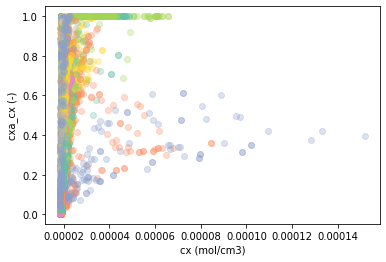

In [5]:
unique_values = df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cx'], subset['cxa_cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cx (mol/cm3)')
plt.ylabel('cxa_cx (-)')

plt.show()

/tmp/ipykernel_595/1730603382.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cx'], subset['cxd_cx'], alpha=0.3,


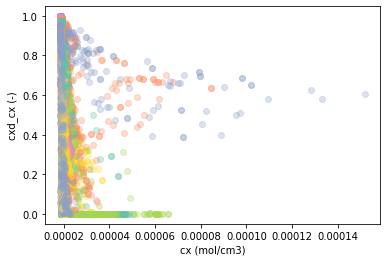

In [6]:
unique_values = df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cx'], subset['cxd_cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cx (mol/cm3)')
plt.ylabel('cxd_cx (-)')

plt.show()

In [18]:
dfissue.shape

(3929, 51)

/tmp/ipykernel_595/4223189543.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cx'], subset['cxa_cx'], alpha=0.3,


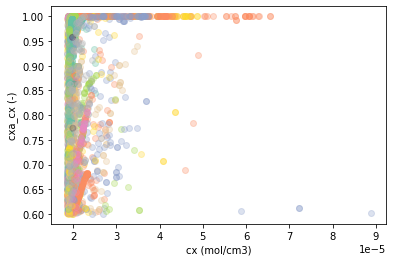

In [19]:
unique_values = dfissue['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = dfissue[dfissue['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cx'], subset['cxa_cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cx (mol/cm3)')
plt.ylabel('cxa_cx (-)')

plt.show()

In [46]:
pSetSelect = np.array(list(pSetSelect))
print(pSetSelect)

[97  3 70  7  8 76 49 51 83 58 62]


In [ ]:
#array([97,  3, 70,  7,  8, 76, 49, 51, 83, 58, 62])

/tmp/ipykernel_595/1998224167.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cc'], subset['co'], alpha=0.3,


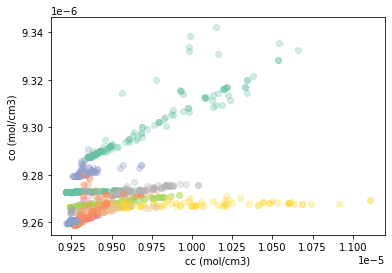

In [22]:
unique_values = pSetSelect#df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in pSetSelect:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cc'], subset['co'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('co (mol/cm3)')

plt.show()

/tmp/ipykernel_595/1226528731.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cc'], subset['co'], alpha=0.3,


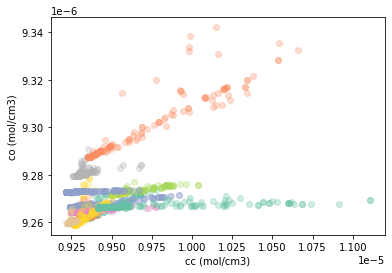

In [65]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cc'], subset['co'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('co (mol/cm3)')

plt.show()

In [68]:
keepdf['cc-co']= keepdf['cc']-keepdf['co']

/tmp/ipykernel_595/2216653057.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'], subset['cc-co'], alpha=0.3,


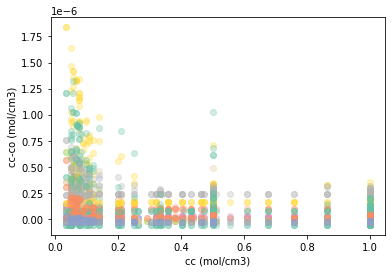

In [70]:
unique_values = pSetSelect#df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in pSetSelect:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'], subset['cc-co'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('cc-co (mol/cm3)')

plt.show()

In [71]:
min(keepdf['cc-co'])

-5.842640121514181e-08

In [72]:
unique_values

array([97,  3, 70,  7,  8, 76, 49, 51, 83, 58, 62])

In [73]:
min(keepdf['cc-co']/keepdf['co'])

-0.006300749467895522

In [74]:
min(keepdf['cc-co']/keepdf['cc'])

-0.006340700634041544

In [ ]:
#C = 12.01 g/mol
# 0.55 / 1000 / 12 = 0.00055 g
0.55/1000/12 = 4.5833333333333334e-05
0.04 => 3.3333333333333337e-06
1.2 => 9.999999999999999e-05

In [57]:
1.2/1000/12

9.999999999999999e-05

In [75]:
np.mean(keepdf['cl']*keepdf['theta'])

0.00015637528167699056

In [ ]:
print(min(),max())

In [76]:
min(keepdf['cl']*keepdf['theta'])

0.00012847155612627143

/tmp/ipykernel_595/3769852387.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'], subset['cx'], alpha=0.3,


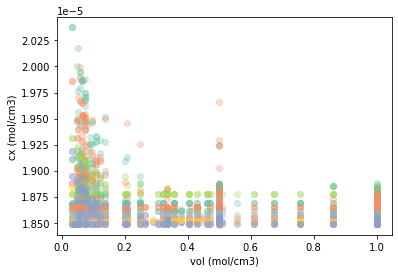

In [94]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'], subset['cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cx (mol/cm3)')

plt.show()

/tmp/ipykernel_595/2227986764.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'], subset['co']+subset['cc'], alpha=0.3,


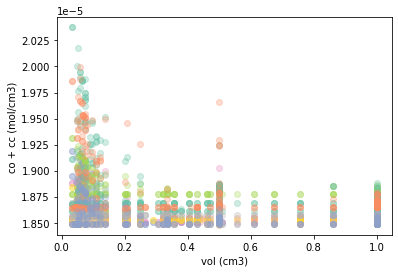

In [142]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'], subset['co']+subset['cc'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('co + cc (mol/cm3)')

plt.show()

In [80]:
1.2e-3/12


9.999999999999999e-05

In [81]:
0.04e-3/12

3.3333333333333337e-06

In [82]:
print(min(keepdf['cx']),max(keepdf['cx']))

1.8478472370843353e-05 2.0377011427596186e-05


In [ ]:
print(min(keepdf['cx']),max(keepdf['cx']))

In [97]:
print(4 *0.66/1000/12,16*2/1000/12)

0.00022 0.0026666666666666666


In [83]:
print(min(keepdf['cc-co']),max(keepdf['cc-co']))

-5.842640121514181e-08 1.8384842609185186e-06


In [84]:
mehrCo = keepdf[keepdf['cc-co']<0]

In [85]:
mehrCo.shape

(657, 53)

/tmp/ipykernel_996/3835180229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3,
/tmp/ipykernel_996/3835180229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mehrCo['cc'], mehrCo['cc-co'], #alpha=0.3,
/tmp/ipykernel_996/3835180229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping w

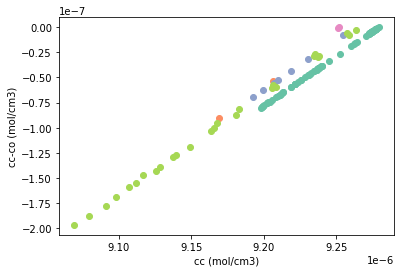

In [89]:
unique_values

array([8, 49, 58, 62, 70, 97], dtype=object)

/tmp/ipykernel_996/252686976.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cx'], subset['cxa']/subset['cx'], alpha=0.3,


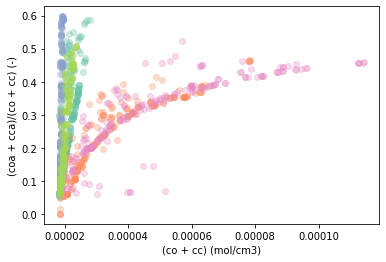

/tmp/ipykernel_595/190162253.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'],( subset['cs']+subset['cl']), alpha=0.3,


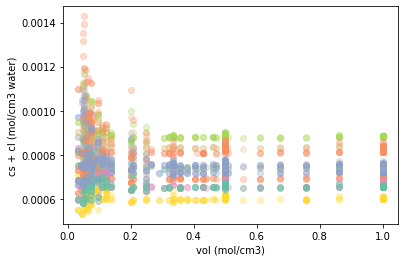

In [101]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'],( subset['cs']+subset['cl']), alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cs + cl (mol/cm3 water)')

plt.show()

/tmp/ipykernel_595/2693691560.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'],( subset['cs'])*subset['theta'], alpha=0.3,


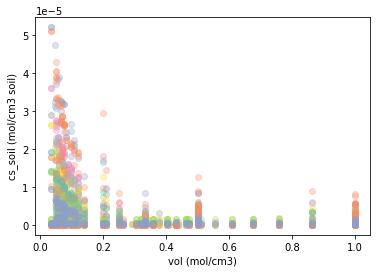

In [145]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'],( subset['cs'])*subset['theta'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cs_soil (mol/cm3 soil)')

plt.show()

/tmp/ipykernel_595/1628301724.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'],( subset['cs'])/3*2, alpha=0.3,


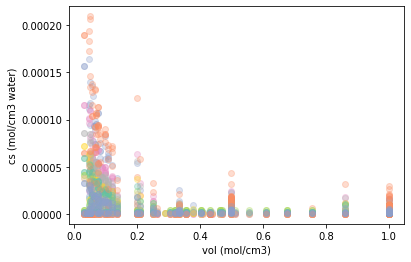

In [158]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'],( subset['cs'])/3*2, alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cs (mol/cm3 water)')

plt.show()

/tmp/ipykernel_595/3187865004.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['vol'],( subset['cs']+subset['cl'])*subset['theta'], alpha=0.3,


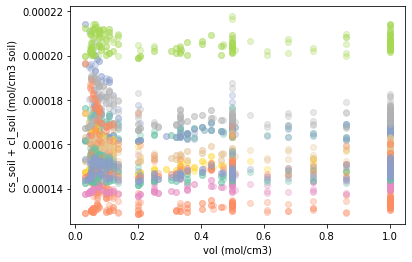

In [146]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['vol'],( subset['cs']+subset['cl'])*subset['theta'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cs_soil + cl_soil (mol/cm3 soil)')

plt.show()

In [103]:
keepdf['theta']

696      0.222924
697      0.238297
698      0.219350
699      0.239870
700      0.185453
           ...   
22916    0.199065
22917    0.194493
22918    0.192857
22919    0.198280
22920    0.190649
Name: theta, Length: 2573, dtype: float64

In [104]:
paramsets['theta']

0     0.306568
1     0.285420
2     0.304816
3     0.311329
4     0.281680
        ...   
94    0.291178
95    0.283922
96    0.299954
97    0.303284
98    0.309446
Name: theta, Length: 99, dtype: float64

In [119]:
keepdf['cscl'] = ( keepdf['cs']+keepdf['cl'])*keepdf['theta']

In [120]:
keepdf[keepdf['cscl'] ==max(keepdf['cscl'] )]['pSet']

12050    51
Name: pSet, dtype: object

In [121]:
paramsets.loc[51]

beta_C        0.031325
beta_O        0.065431
C_thres,C     0.298378
C_thres,O     0.156963
DS_W          0.025864
k_C,S        23.293744
k_d,C         2.302600
k_d,O         0.108594
K_L           7.149617
k_O,S        31.697790
k_r,C        14.147278
k_r,O         1.368694
m_max,C       0.007938
m_max,O       0.001865
p_L           0.037608
ro_B          1.269029
u_max,C       0.835881
u_max,O       0.023262
v_max,L       0.002206
Y             0.122343
Y_C           0.725647
Y_O           0.980161
theta         0.289234
CSS_max       0.976935
k_sorp        0.008812
CL_init      10.486663
CS_init       0.090675
Name: 51, dtype: float64

In [109]:
paramsets

,beta_C,beta_O,"C_thres,C","C_thres,O",DS_W,"k_C,S","k_d,C","k_d,O",K_L,"k_O,S",...,"u_max,O","v_max,L",Y,Y_C,Y_O,theta,CSS_max,k_sorp,CL_init,CS_init
0,0.691167,0.842067,0.281219,0.044177,0.577160,359.916532,1.095294,2.393030,0.036948,515.578895,...,0.062827,0.022852,0.234902,0.034053,0.469288,0.306568,1.437543,0.039387,11.083551,0.006590
1,0.000262,0.019111,0.165317,0.064543,0.817303,45.698887,0.557839,0.205172,0.023643,267.005433,...,0.018034,0.007276,0.487350,0.173275,0.294169,0.285420,1.421506,0.116672,11.870338,0.036058
2,0.000545,0.137665,0.192125,0.093661,1.651453,37.035661,1.262547,5.015538,0.032900,42.257036,...,0.037436,0.004198,0.118661,0.073934,0.207924,0.304816,0.117044,0.007930,8.527424,0.012511
3,0.000257,0.036659,0.189989,0.052792,0.464336,51.832266,0.492477,0.110219,0.000852,266.614377,...,0.012368,0.013610,0.050240,0.034972,0.510557,0.311329,1.598271,0.011472,8.856918,0.031606
4,0.002807,0.013836,0.214415,0.123551,0.069015,17.799625,0.380583,10.368275,0.001898,264.346991,...,0.084718,0.012007,0.010471,0.450769,0.641183,0.281680,1.106923,0.042139,9.811557,0.090463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.189394,0.021075,0.210233,0.116312,0.010269,42.995557,0.244397,2.211250,0.021039,489.817148,...,0.022700,0.262582,0.139725,0.070778,0.795052,0.291178,1.233192,0.098103,9.492146,0.038680
95,0.137496,0.485741,0.181280,0.146070,0.095294,3.312026,0.975345,1.618790,0.014306,7.939796,...,0.024508,0.118889,0.523761,0.021275,0.744664,0.283922,1.287253,0.076816,9.516327,0.019544
96,0.001870,0.039111,0.110730,0.074887,0.071074,87.825283,2.329951,8.874112,0.000138,175.274590,...,0.130094,0.573917,0.033716,0.035456,0.200649,0.299954,0.451967,0.006661,7.466796,0.047272
97,0.079662,0.415751,0.103562,0.077734,0.014471,75.645247,13.829579,0.115839,0.016265,508.446438,...,0.026174,0.012604,0.374705,0.070914,0.144132,0.303284,1.562342,0.010222,9.044359,0.014316


In [122]:
df83 = keepdf[keepdf['pSet']==51]

/tmp/ipykernel_595/2093144916.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['cx'], df83['cxa']/df83['cx'], alpha=0.3,


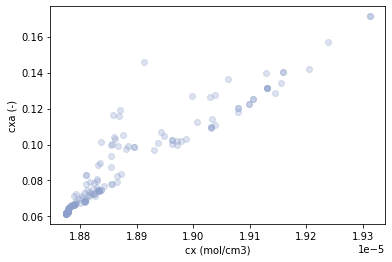

In [123]:

plt.scatter(df83['cx'], df83['cxa']/df83['cx'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cx (mol/cm3)')
plt.ylabel('cxa (-)')

plt.show()

/tmp/ipykernel_595/2256031251.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['cs'], ( df83['cs']+df83['cl'])*df83['theta'], alpha=0.3,


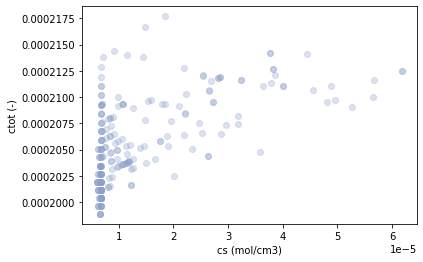

In [125]:

plt.scatter(df83['cs'], ( df83['cs']+df83['cl'])*df83['theta'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs (mol/cm3)')
plt.ylabel('ctot (-)')

plt.show()

In [116]:
max(( df83['cs']+df83['cl'])*df83['theta'])

0.00019662225333660913

In [126]:
max(df83['theta'])

0.2560492840621469

/tmp/ipykernel_595/1505057107.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['cc'], df83['co'], alpha=0.3,


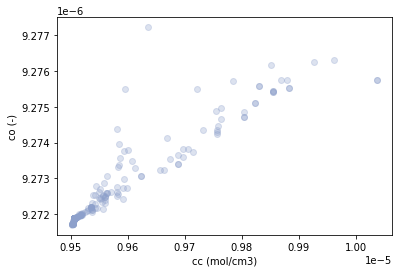

In [127]:

plt.scatter(df83['cc'], df83['co'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('co (-)')

plt.show()

/tmp/ipykernel_595/4002833985.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['cc'], df83['cca']/df83['cc'], alpha=0.3,


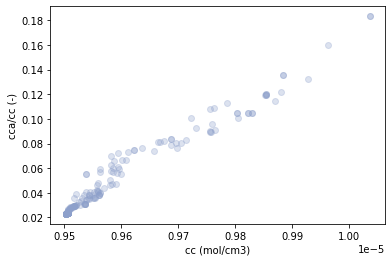

In [129]:

plt.scatter(df83['cc'], df83['cca']/df83['cc'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cc (mol/cm3)')
plt.ylabel('cca/cc (-)')

plt.show()

/tmp/ipykernel_595/1102912322.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['cs'], df83['css2'], alpha=0.3,


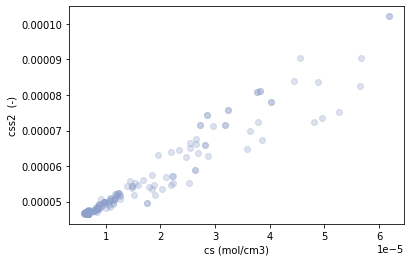

In [130]:

plt.scatter(df83['cs'], df83['css2'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs (mol/cm3)')
plt.ylabel('css2  (-)')

plt.show()

/tmp/ipykernel_595/3656100862.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['cs'], subset['css2'], alpha=0.3,


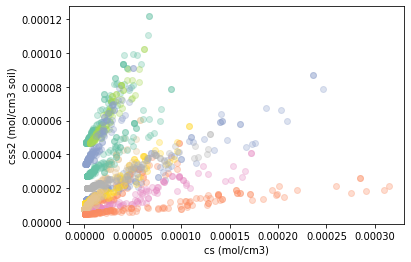

In [133]:
unique_values = keepdf['pSet'].unique()
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = keepdf[keepdf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cs'], subset['css2'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs (mol/cm3)')
plt.ylabel('css2 (mol/cm3 soil)')

plt.show()

/tmp/ipykernel_595/423771510.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['vol'], df83['cs'], alpha=0.3,


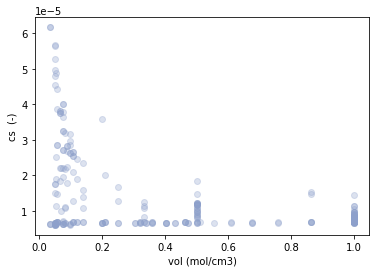

In [135]:

plt.scatter(df83['vol'], df83['cs'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cs  (-)')

plt.show()

/tmp/ipykernel_595/781424282.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df83['vol'],np.log( df83['cs']), alpha=0.3,


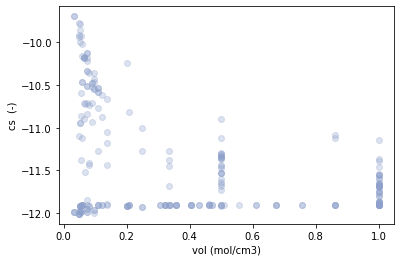

In [136]:

plt.scatter(df83['vol'],np.log( df83['cs']), alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('vol (mol/cm3)')
plt.ylabel('cs  (-)')

plt.show()

In [138]:
print(np.min(df83['cs']),np.max(df83['cs']))

6.0802314413555224e-06 6.175174552146627e-05


In [139]:
print(np.min(keepdf['cs']),np.max(keepdf['cs']))

1.10349287357668e-07 0.0003143103630958735


In [147]:
paramsets.loc[53]

beta_C        0.000206
beta_O        0.647743
C_thres,C     0.182964
C_thres,O     0.153192
DS_W          1.140362
k_C,S         1.010202
k_d,C         1.630019
k_d,O         0.330670
K_L           5.281327
k_O,S         1.218232
k_r,C        71.169961
k_r,O         1.541466
m_max,C       0.005494
m_max,O       0.000101
p_L           0.028776
ro_B          1.145905
u_max,C       0.992209
u_max,O       0.020643
v_max,L       0.001016
Y             0.315776
Y_C           0.015346
Y_O           0.042323
theta         0.281939
CSS_max       0.951820
k_sorp        0.008577
CL_init       9.567962
CS_init       0.049539
Name: 53, dtype: float64

In [156]:
keepdfhcs = df[df['cs']/3*2>0.0000458333333333333]

In [157]:
len(np.unique(keepdfhcs['pSet']))

90

In [153]:
np.unique(keepdf['pSet'])

array([3, 7, 8, 49, 51, 58, 62, 70, 76, 83, 97], dtype=object)